![uwm_logo1_pl.svg](https://uwm.edu.pl/sites/default/files/2023-01/uwm_logo_poziome_PL.png)

# Symulacje komputerowe
## Laboratorium 03 - Automaty komórkowe
**mgr inż. Adam Zalewski**<br>
na podstawie materiałów **dra inż. Mariusza Bodziocha**

**Zadanie 0.** Zaimportuj niezbędne biblioteki.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


**Zadanie 1.** Napisać klasę <code>class RuleAutomaton:</code>, która posiada pola *initial_state*, *grid_size*. Napisać metodę <code>def visualize(self, grid)</code>, która zwraca wykres, gdzie *grid* odpowiada za wyświetlanie siatki, <code>def run(self, rule, animation=False, grid=False):</code>, która uruchomi symulację automatu komórkowego dla podanych parametrów, gdzie:
- rule - określa regułę automatu
- animation - określa czy program ma utworzyć animację
- grid - określa czy ma zostać narysowana siatka pomocnicza

In [22]:
class RuleAutomaton:
    def __init__(self, initial_state: np.ndarray, grid_size: tuple):
        self.initial_state = initial_state
        self.grid_size = grid_size

        self.__create_grid()
    def __create_grid(self):
        self.grid = np.zeros(self.grid_size, dtype = np.int8)
        self.grid[0, :] =  self.initial_state
    
    def visualize(self, grid):
        pass
        
    def run(self, rule, animation=False, grid=False):
        transition = {}
        rule_bits = f'{rule:08b}'
        print(rule_bits)

        for i in range(8):
            transition[f"{i:03b}"] = int(rule_bits[7-i])
        
        for n in range(self.grid_size[0] - 1):
            for head in range(self.grid_size[1]-2):
                key = f"{self.grid[n, head]}{self.grid[n, head+1]}{self.grid[n, head+2]}"
                self.grid[n+1, head+1] = transition[key]
        plt.imshow(self.grid, cmap= "gray_r")

**Zadanie 2.** Wykorzystując klasę z zadania 1 stworzyć animacje dla reguł przedstawionych na wykładzie.

11111010


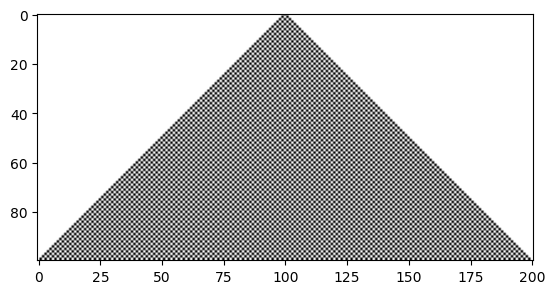

In [25]:
gs = (100, 201)
ini = np.zeros(gs[1])
ini[gs[1]//2] = 1 
ra = RuleAutomaton(ini, gs)
ra.run(250)

**Zadanie 3.** Zaimplementować automat *Gra w życie*. Automat powinien działać dla różnych warunków brzegowych oraz rodzajów sąsiedztwa.